## Guide - pyLEnM package
# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pyLEnM** package!<br>
Let’s get started!


## Setup
Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [ ]:
# pip install pylenm

In [1]:
# Import our packages
import pylenm
from pylenm import functions, usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.13.10'

In [3]:
url_1 = 'https://raw.githubusercontent.com/AurelienMeray/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
url_2 = 'https://github.com/AurelienMeray/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.simplify_data(inplace=True)
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



## Functions

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date_range
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map
    24) getCommonDates
    25) getCleanData
    26) getJointData
    27) get_Best_GP
    28) fit_gp
    29) interpolate_topo
    30) get_Best_Wells




 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [5]:
usage.get_FunctionDescription('getCleanData')


getCleanData (analytes)
Description: 
    Creates a table filling the data from the concentration dataset for a given analyte list where the columns are 
    multi-indexed as follows [analytes, well names] and the index is all of the dates in the dataset. 
    Many NaN should be expected.
Parameters:
    analytes (list of strings): list of analyte names to use



In [6]:
# We'll save a list of the analytes we want to look at and pass it to the functions below
analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']

pylenm.getCleanData(analytes)

ANALYTE_NAME    DEPTH_TO_WATER                                               \
STATION_ID             FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8 FOB  1D   
COLLECTION_DATE                                                               
1990-01-01                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-02                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-03                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-06                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-07                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...                        ...     ...     ...    ...    ...    ...     ...   
2015-09-10                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-21                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-22                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-23                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-24                17.4    15.4   25.16    NaN    NaN    NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D FOB 15D FPZ  2A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN   14.73     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN    21.5     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FPZ  3A FPZ  4A FPZ  6A FPZ  6B FPZ  7A FPZ  7B FPZ  8A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                              \
STATION_ID      FPZ  8B FPZ008AR FPZ008BR FSB 76 FSB 76A FSB 76B FSB 76C   
COLLECTION_DATE                                                            
1990-01-01          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-02          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-03          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-06          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-07          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
...                 ...      ...      ...    ...     ...     ...     ...   
2015-09-10          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
2015-09-21          NaN      Na

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [7]:
lags = [1,3,7,12]
shared_dates = pylenm.getCommonDates(analytes=analytes, lag=lags)
shared_dates

Date Ranges Number of wells
Dates      Lag                                         
1990-01-01 1    1989-12-31 - 1990-01-02              16
           3    1989-12-29 - 1990-01-04              24
           7    1989-12-25 - 1990-01-08              41
           12   1989-12-20 - 1990-01-13              53
1990-01-02 1    1990-01-01 - 1990-01-03              14
...                                 ...             ...
2015-09-23 12   2015-09-11 - 2015-10-05              15
2015-09-24 1    2015-09-23 - 2015-09-25               8
           3    2015-09-21 - 2015-09-27              14
           7    2015-09-17 - 2015-10-01              15
           12   2015-09-12 - 2015-10-06              15

[9688 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

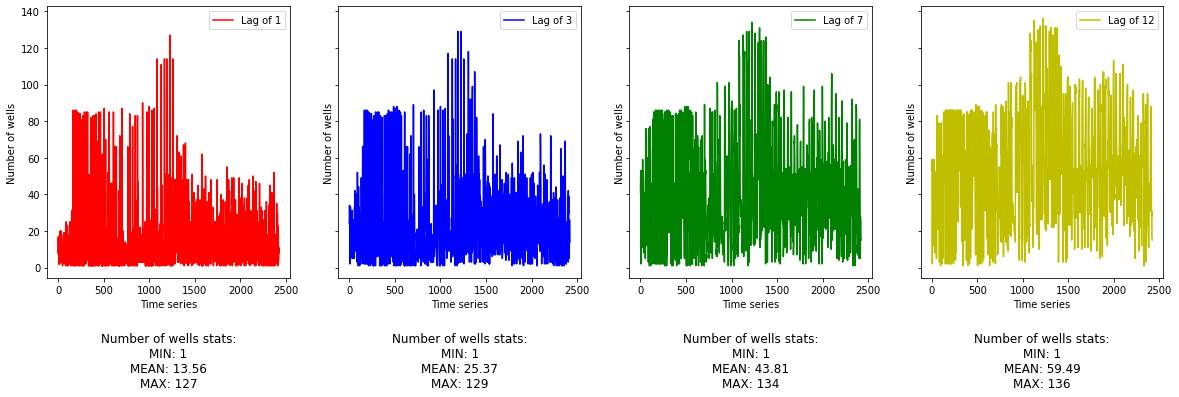

In [8]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of wells'])
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of wells')
    stats_text = str('Number of wells stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [9]:
lag = 12
jointData = pylenm.getJointData(analytes, lag=lag)
jointData

GENERATING DATA WITH A LAG OF 12.
Progress:
1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%, 11%, 12%, 13%, 14%, 15%, 16%, 17%, 18%, 19%, 20%, 21%, 22%, 23%, 24%, 25%, 26%, 27%, 28%, 29%, 30%, 31%, 32%, 33%, 34%, 35%, 36%, 37%, 38%, 39%, 40%, 41%, 42%, 43%, 44%, 45%, 46%, 47%, 48%, 49%, 50%, 51%, 52%, 53%, 54%, 55%, 56%, 57%, 58%, 59%, 60%, 61%, 62%, 63%, 64%, 65%, 66%, 67%, 68%, 69%, 70%, 71%, 72%, 73%, 74%, 75%, 76%, 77%, 78%, 79%, 80%, 81%, 82%, 83%, 84%, 85%, 86%, 87%, 88%, 89%, 90%, 91%, 92%, 93%, 94%, 95%, 96%, 97%, 98%, 99%, Completed


ANALYTE_NAME            DEPTH_TO_WATER                                       \
STATION_ID                     FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8   
1989-12-20 - 1990-01-13            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-21 - 1990-01-14            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-22 - 1990-01-15            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-25 - 1990-01-18            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-26 - 1990-01-19            NaN     NaN     NaN    NaN    NaN    NaN   
...                                ...     ...     ...    ...    ...    ...   
2015-08-29 - 2015-09-22            NaN     NaN     NaN    NaN    NaN    NaN   
2015-09-09 - 2015-10-03           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-10 - 2015-10-04           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-11 - 2015-10-05           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-12 - 2015-10-06           17.4    15.4   25.16    NaN    NaN    NaN   

ANALYTE_NAME                                                             \
STATION_ID              FOB  1D FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     NaN     NaN     NaN     NaN   14.73   
2015-09-09 - 2015-10-03     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-10 - 2015-10-04     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-11 - 2015-10-05     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-12 - 2015-10-06     NaN     NaN     NaN    21.5     NaN   14.73   

ANALYTE_NAME                                                             \
STATION_ID              FOB 15D FPZ  2A FPZ  3A FPZ  4A FPZ  6A FPZ  6B   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     3.2     NaN    6.45     3.5     4.1   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                               \
STATION_ID              FPZ  7A FPZ  7B FPZ  8A FPZ  8B FPZ008AR FPZ008BR   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN      NaN      NaN   
...                         ...     ...     ...     ...      ...      ...   
2015-08-29 - 2015-09-22     4.6    4.05     NaN     NaN     3.73     3.77   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN      NaN      NaN   

ANALYTE_NAME      

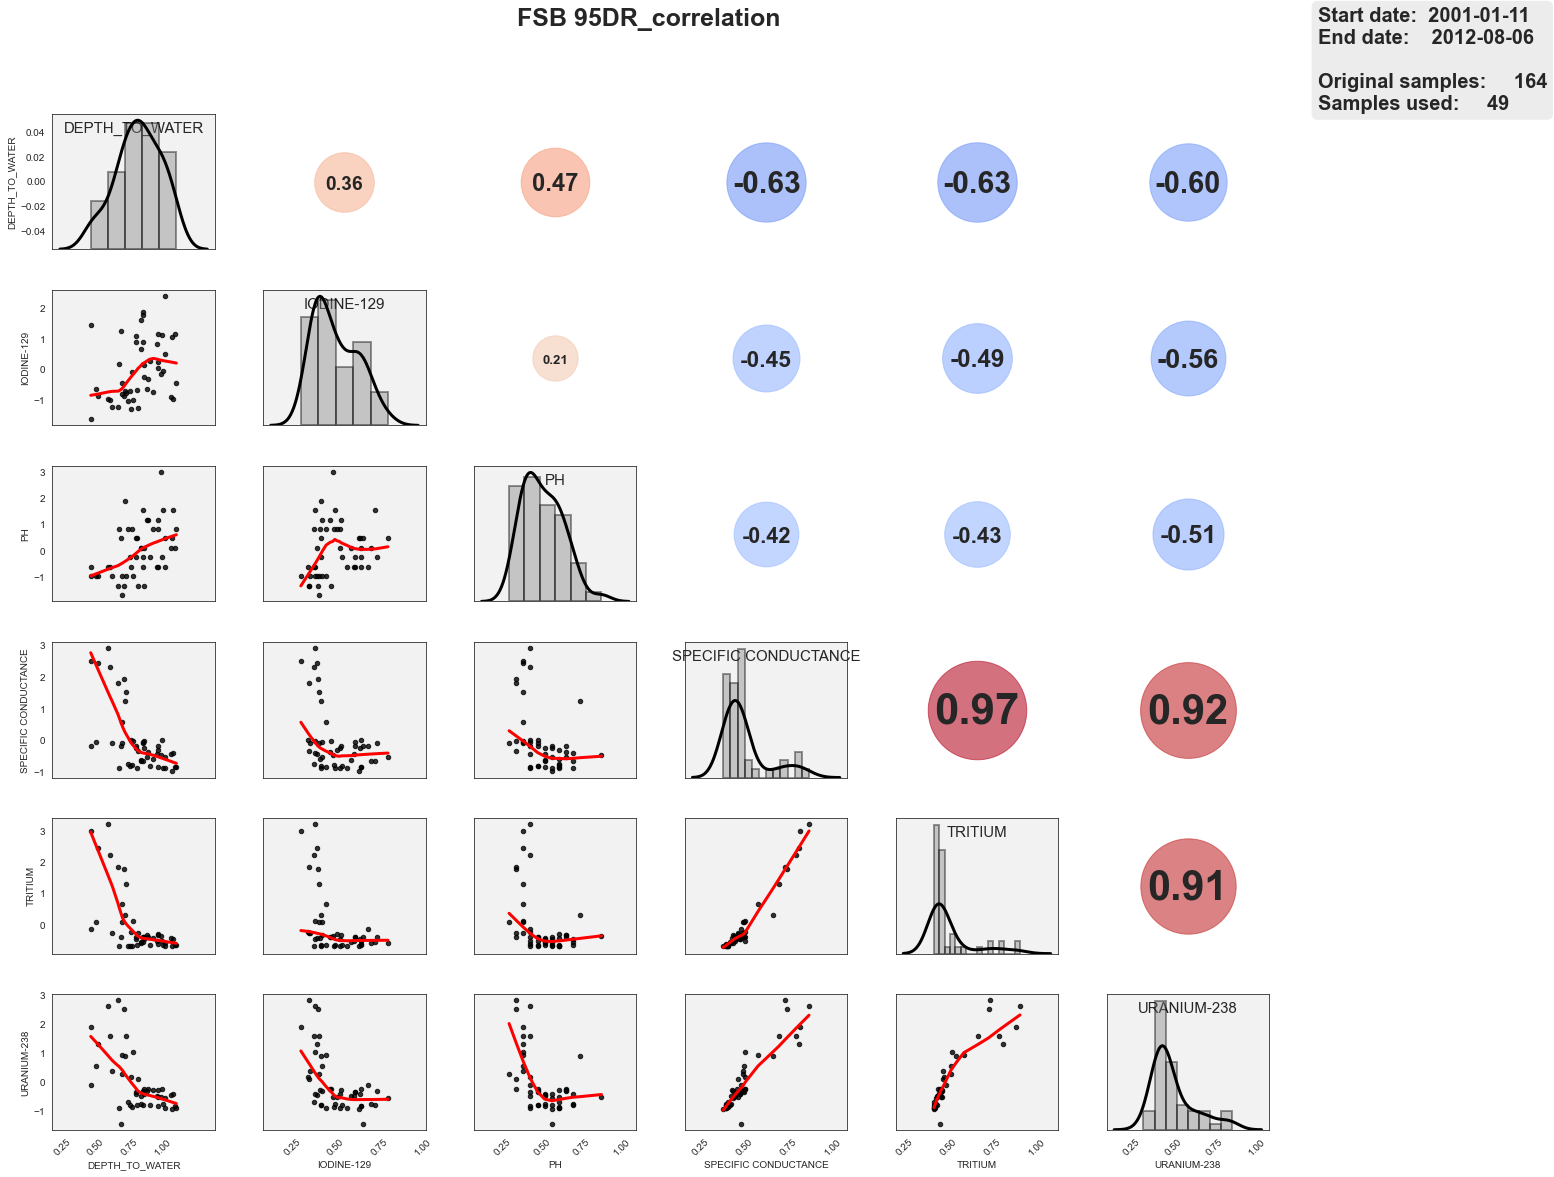

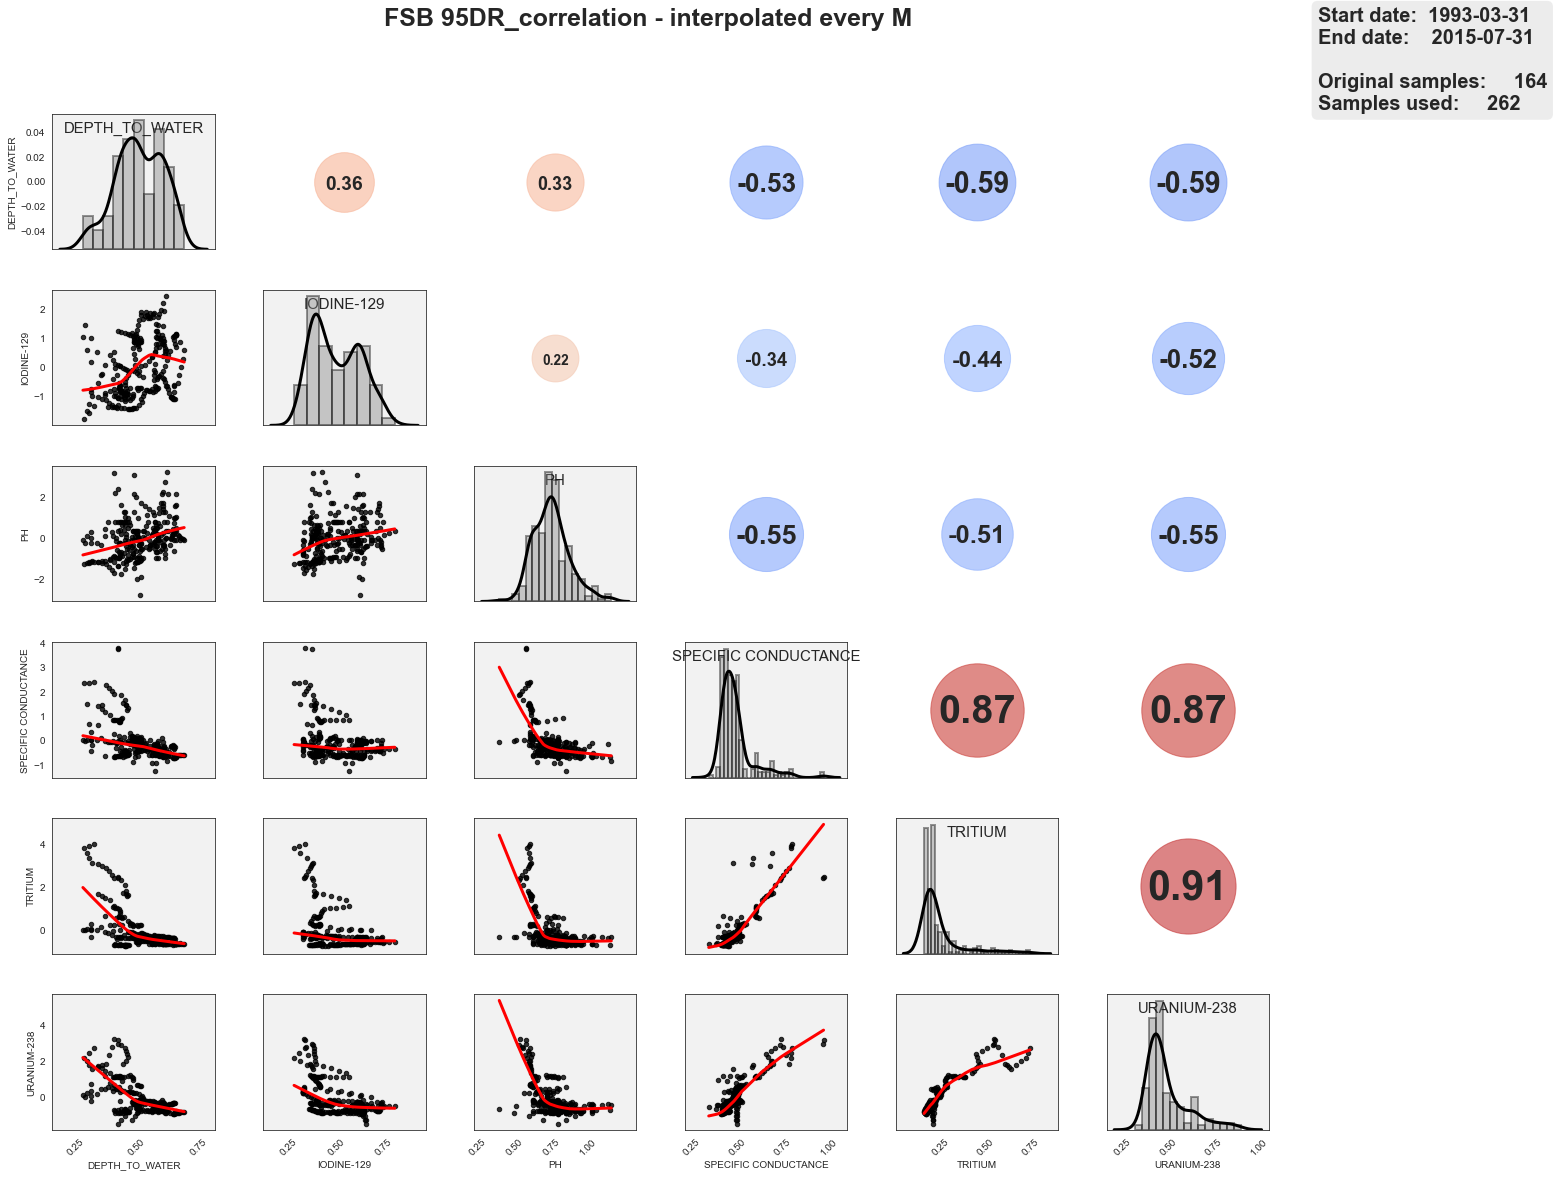

In [10]:
pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes)

pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes,
                         interpolate=True, frequency='M', 
                         remove_outliers=True, z_threshold=4)

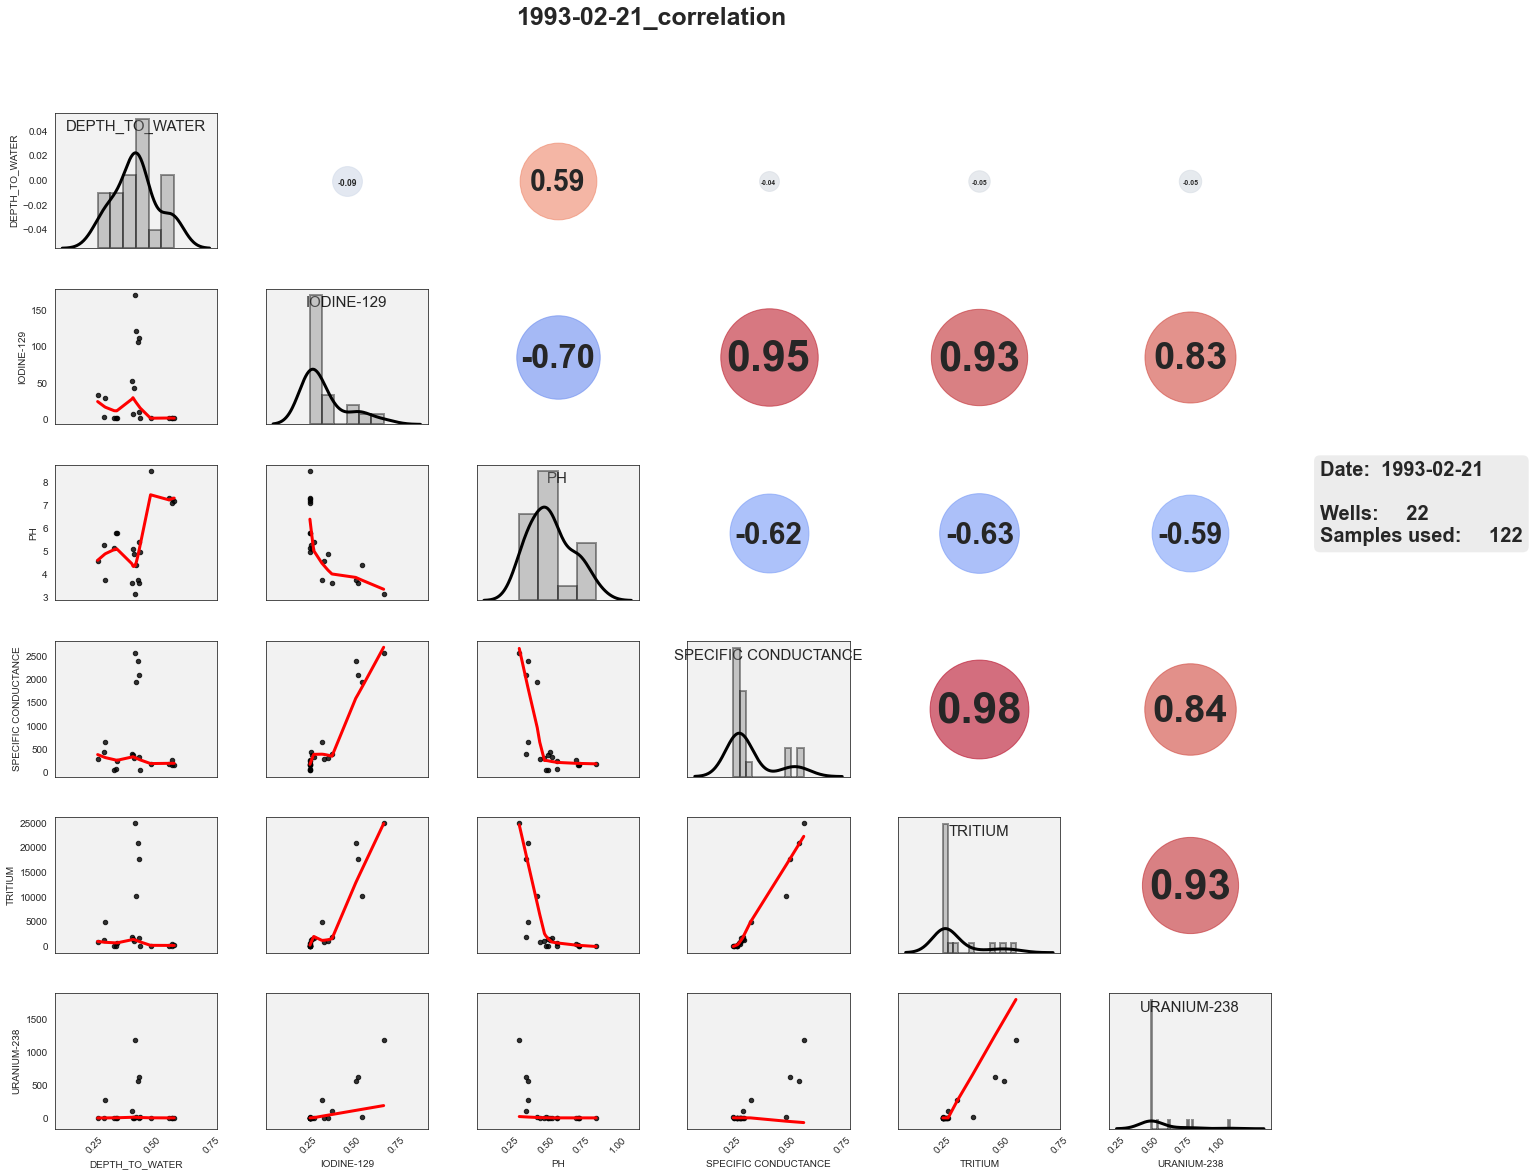

In [11]:
pylenm.plot_corr_by_date_range('1993-02-21', analytes=analytes)

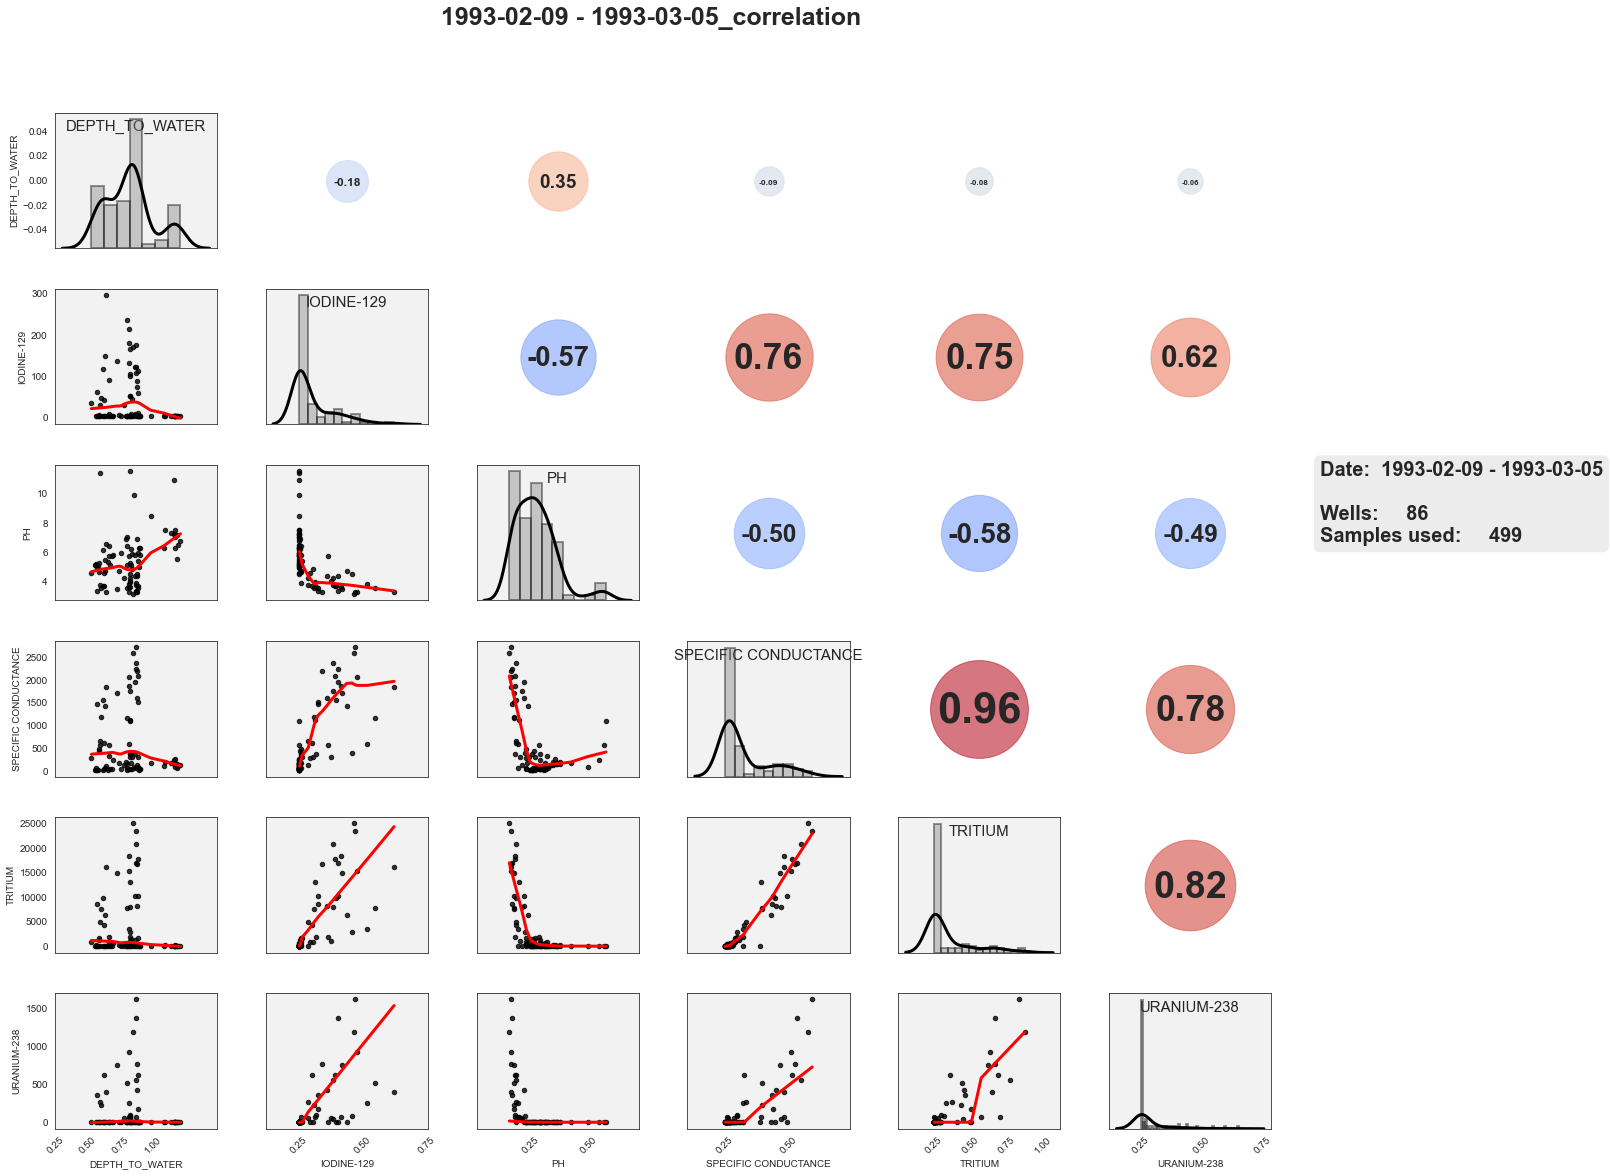

In [12]:
pylenm.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes)

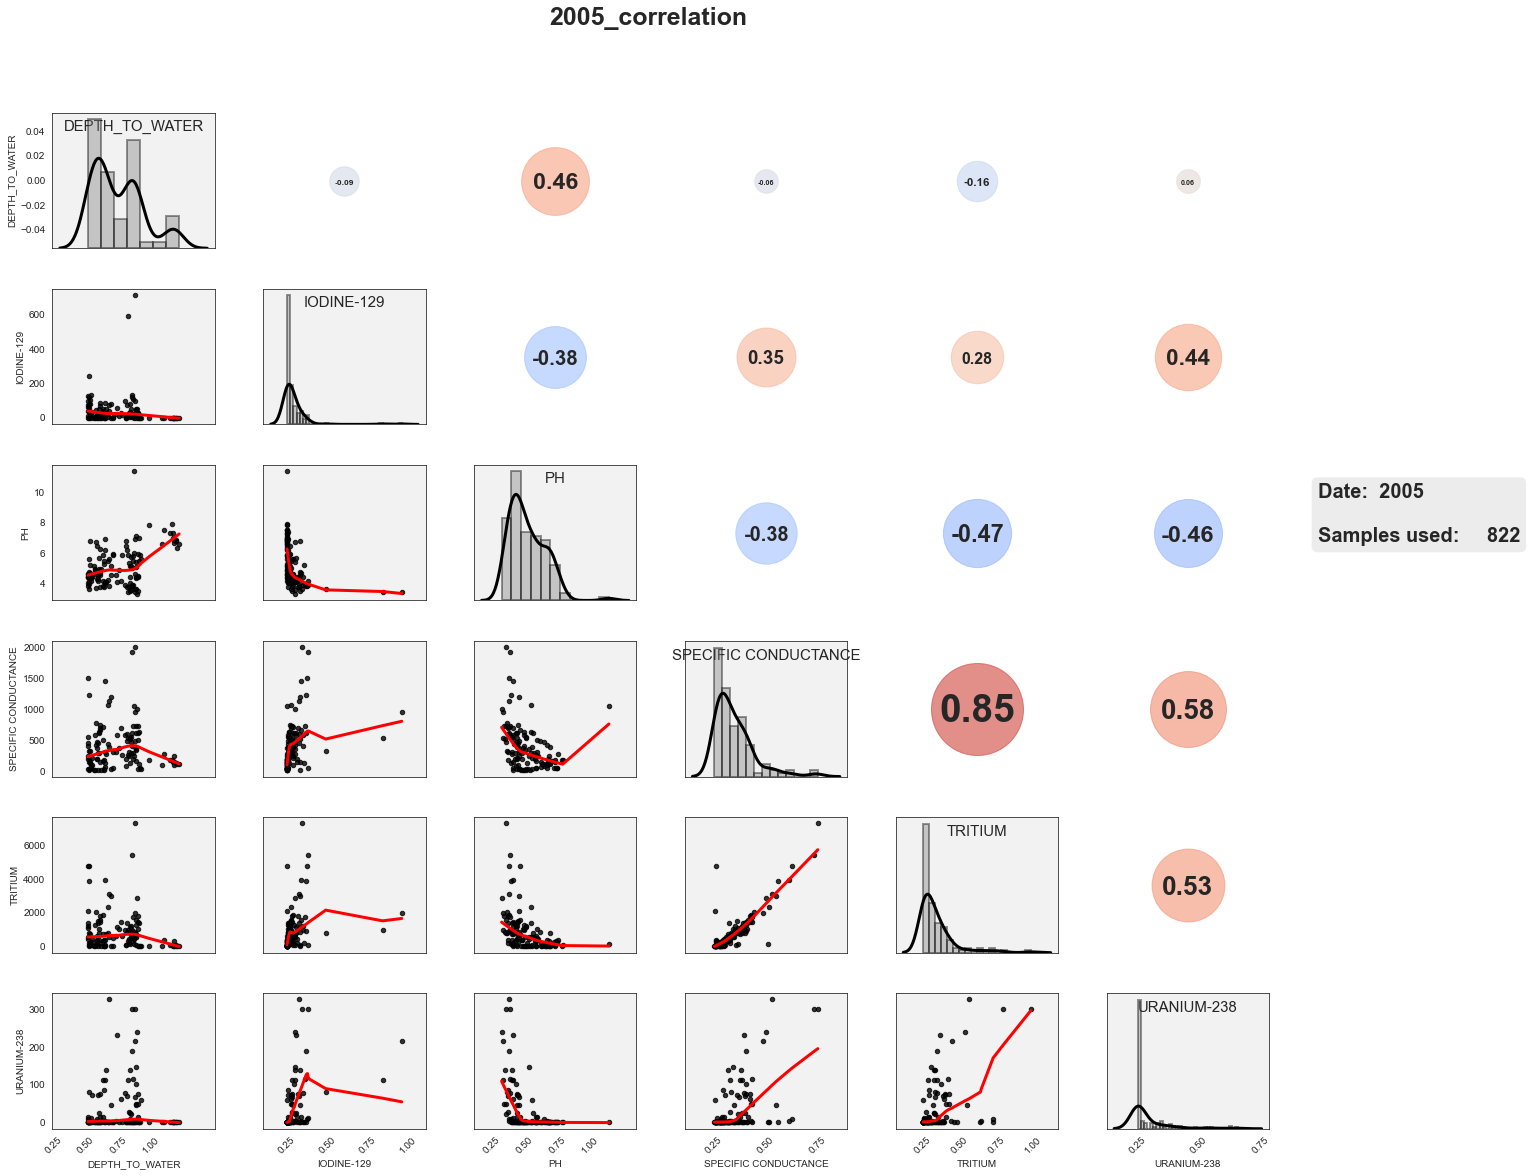

In [13]:
pylenm.plot_corr_by_year(2005, analytes=analytes, remove_outliers=True, z_threshold=3)

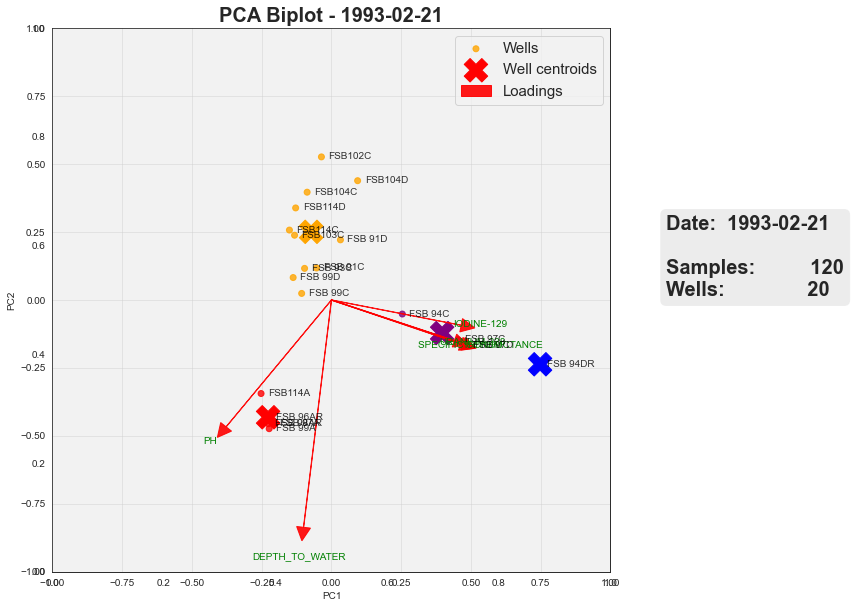

In [14]:
pylenm.plot_PCA_by_date('1993-02-21', analytes)

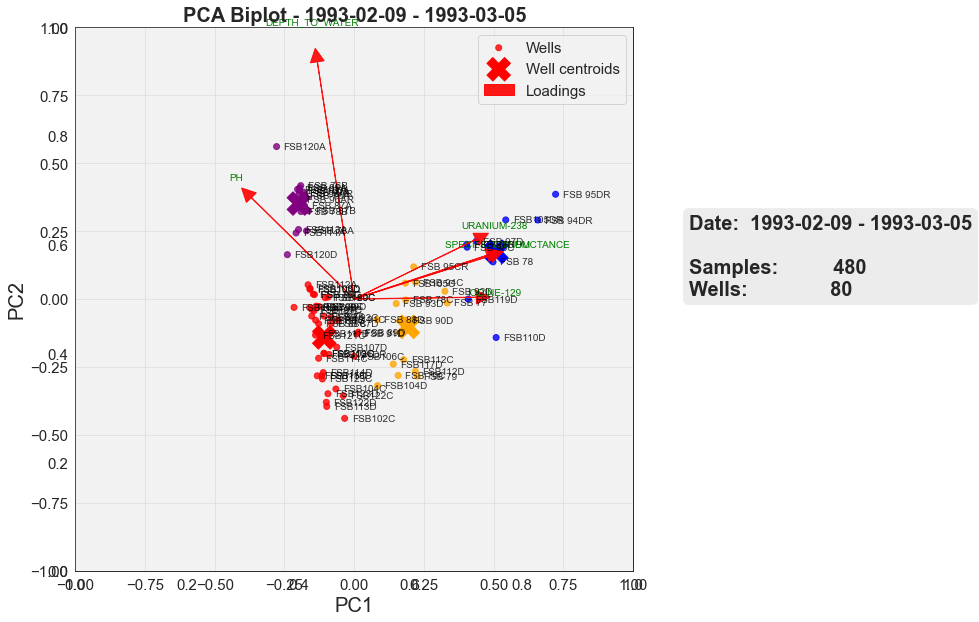

In [15]:
pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=lag)

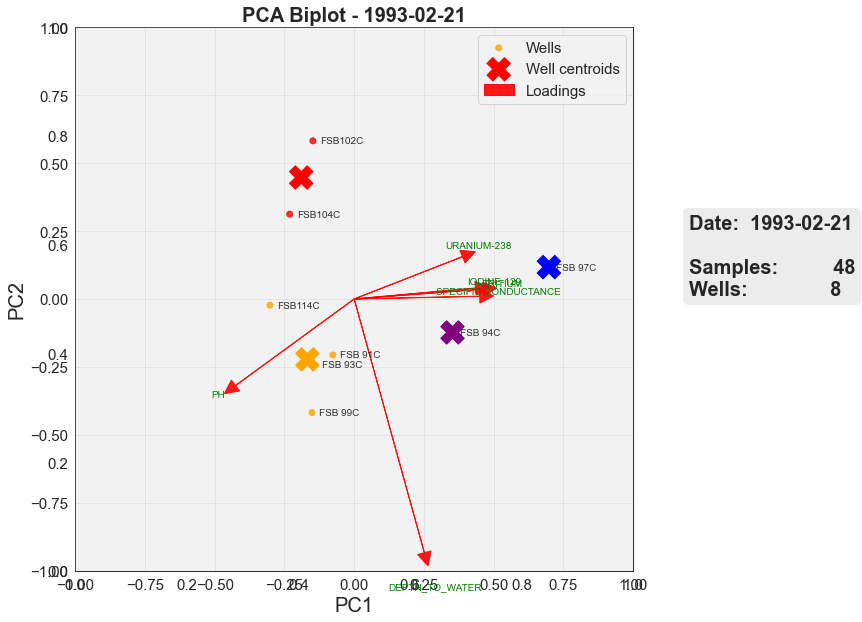

In [16]:
 pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

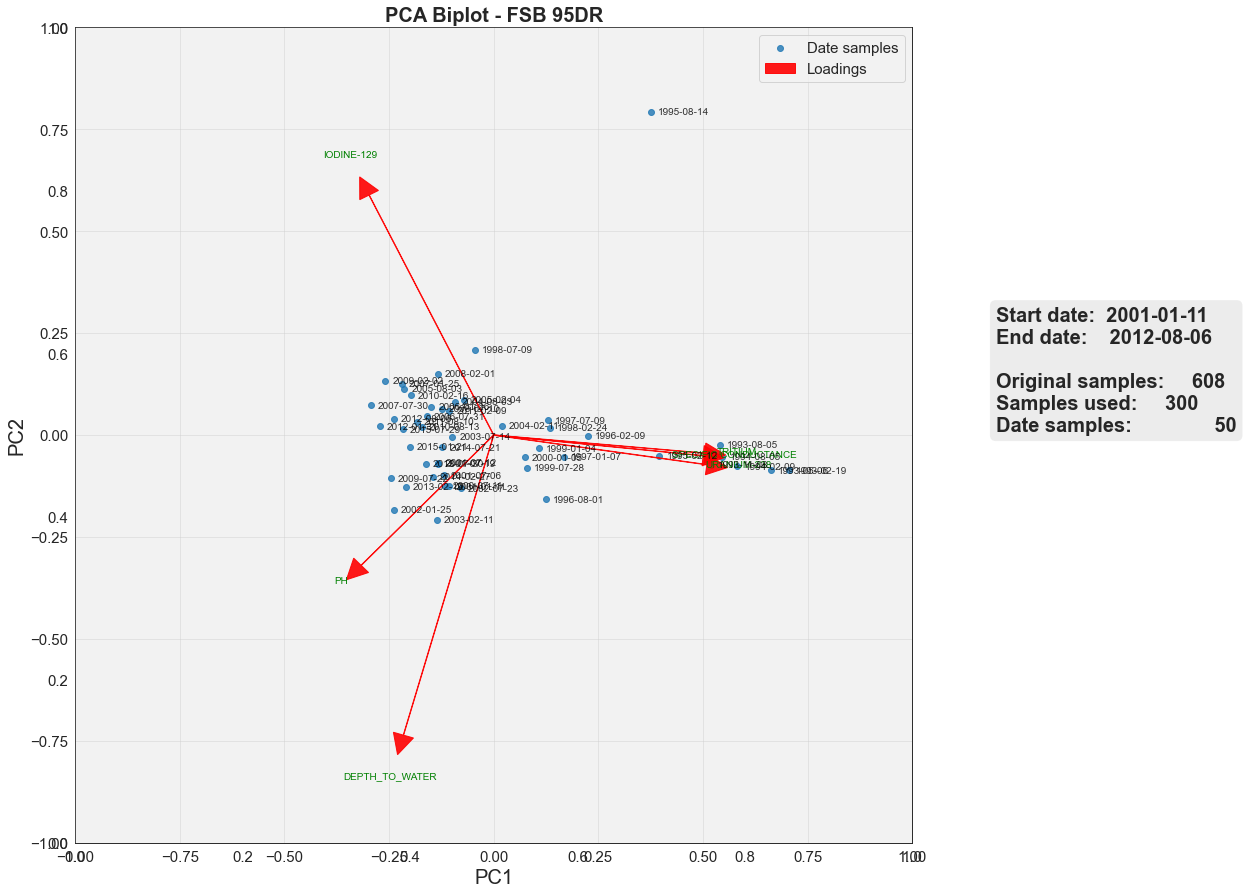

In [28]:
pylenm.plot_PCA_by_well(well_name='FSB 95DR', analytes=analytes)

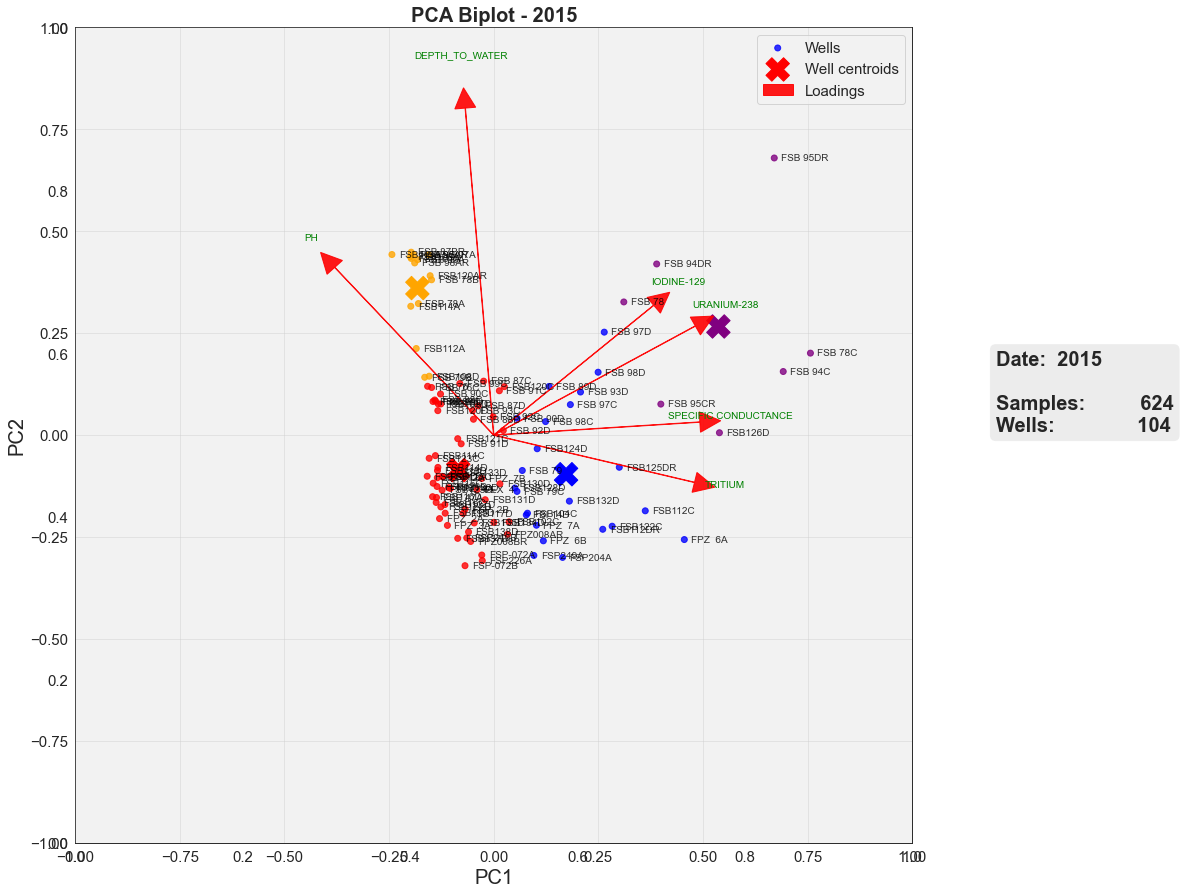

In [25]:
pylenm.plot_PCA_by_year(2015, analytes=analytes)

## Clustering

In [5]:
tritium = pylenm.interpolate_wells_by_analyte('TRITIUM', frequency='2W')
tritium = np.log10(tritium)
tritium = tritium.dropna(axis=1)
tritium

FPZ  2A   FSB126D   FSB 98C   FSB 90D   FSB107D   FSB 99C  \
2002-12-08  1.001355  3.329412  3.255561  3.084693  2.780855  3.141006   
2002-12-22  0.910289  3.329412  3.254826  3.100708  2.835694  3.132761   
2003-01-05  0.951031  3.329412  3.254091  3.116153  2.884378  3.124357   
2003-01-19  0.938728  3.329412  3.253354  3.131067  2.928150  3.115787   
2003-02-02  0.852136  3.329412  3.255825  3.132189  2.967912  3.107045   
...              ...       ...       ...       ...       ...       ...   
2015-08-02 -0.028350  3.032691  2.712939  1.443446  2.644931  1.822652   
2015-08-16 -0.036910  3.031408  2.712650  1.445604  2.644931  1.822168   
2015-08-30 -0.045641  3.031408  2.712650  1.445604  2.644931  1.822168   
2015-09-13 -0.053863  3.031408  2.712650  1.445604  2.644931  1.822168   
2015-09-27 -0.055517  3.031408  2.712650  1.445604  2.644931  1.822168   

             FSB104D   FOB 13D   FSB110D   FSB113C   FSB 87D   FSB 99A  \
2002-12-08  1.154622  2.658829  2.836826  1.595075  3.074001  1.713334   
2002-12-22  1.125442  2.658829  2.820984  1.591948  3.073535  1.709279   
2003-01-05  1.094160  2.658829  2.804543  1.588797  3.073068  1.705186   
2003-01-19  1.060448  2.658829  2.787455  1.585624  3.072601  1.701054   
2003-02-02  1.022947  2.658829  2.767496  1.582427  3.072133  1.696882   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  0.788846  2.724276  2.303196  1.879211  1.592367  1.624045   
2015-08-16  0.775538  2.724276  2.303196  1.878522  1.591065  1.624798   
2015-08-30  0.771440  2.724276  2.303196  1.878522  1.591065  1.624798   
2015-09-13  0.767304  2.724276  2.303196  1.878522  1.591065  1.624798   
2015-09-27  0.763659  2.724276  2.303196  1.878522  1.591065  1.624798   

             FSB115C   FSB135D   FSB130D   FSB122D   FSB 87C   FSB112A  \
2002-12-08  0.773549  2.410256  2.513352  2.908978  3.195585  1.593097   
2002-12-22  0.770535  2.410256  2.513352  2.913717  3.193820  1.597026   
2003-01-05  0.767500  2.410256  2.513352  2.918406  3.192048  1.600920   
2003-01-19  0.764444  2.410256  2.513352  2.923044  3.190268  1.604780   
2003-02-02  0.761366  2.410256  2.513352  2.927633  3.188481  1.608606   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  0.338456  2.157109  0.457016  1.231348  2.687625  1.129949   
2015-08-16  0.338456  2.158155  0.426803  1.255077  2.687529  1.123903   
2015-08-30  0.338456  2.158362  0.468790  1.255273  2.687529  1.123852   
2015-09-13  0.338456  2.158362  0.533750  1.255273  2.687529  1.123852   
2015-09-27  0.338456  2.158362  0.626841  1.255273  2.687529  1.123852   

            FSB112DR   FSB108D   FSB112D   FSB 93D   FPZ  3A   FPZ  7B  \
2002-12-08  3.178793  0.898742  1.036529  3.253621  2.029694  1.978808   
2002-12-22  3.178793  0.891602  1.017346  3.254749  2.029694  1.992505   
2003-01-05  3.178793  0.884344  0.997277  3.255875  2.029694  1.917588   
2003-01-19  3.178793  0.876962  0.976235  3.256998  2.029694  1.893530   
2003-02-02  3.178793  0.869452  0.954122  3.257128  2.029694  1.902653   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  2.951297  0.589814  1.945862  2.647511  1.439333  2.175904   
2015-08-16  2.952780  0.574031  1.945862  2.651278  1.439333  2.213475   
2015-08-30  2.952792  0.574031  1.945862  2.651278  1.439333  2.248052   
2015-09-13  2.952792  0.574031  1.945862  2.651278  1.439333  2.278501   
2015-09-27  2.952792  0.574031  1.945862  2.651278  1.439333  2.285557   

             FOB  2D   FSB120C  FSB121DR   FOB  2C   FSB104C  FMC-002H  \
2002-12-08  2.563481  2.728943  0.826799  3.366642  3.100643  1.939987   
2002-12-22  2.563481  2.718516  0.828015  3.366642  3.104852  1.977710   
2003-01-05  2.563481  2.707831  0.829228  3.366642  3.109022  1.997064   
2003-01-19  2.563481  2.696878  0.830438  3.366642  3.113151  2.010586   
2003-02-02  2.563481  2.685641  0.831644  3.366642  3.117242  1.984154   
...          

In [6]:
elements = tritium.shape[0]
rptData = pd.DataFrame(columns=['station_id', 'ratio_repeated'])
for well in tritium.columns:
    try:
        occurance = tritium[well].duplicated().value_counts()[True]
    except KeyError:
        occurance = 0
    rptData = rptData.append({'station_id': well, 'ratio_repeated': occurance/elements}, ignore_index=True)
std_ratio = rptData.describe().T['std'].values[0]
bad_wells = rptData[rptData['ratio_repeated']>1.5*std_ratio]
bad_well_names = bad_wells.station_id.to_list()
print("Bad wells: {}\nRemaining wells: {}".format(len(bad_well_names),elements-len(bad_well_names)))
tritium = tritium.drop(bad_well_names, axis=1)

Bad wells: 44
Remaining wells: 291


(335, 112)
(136, 112)


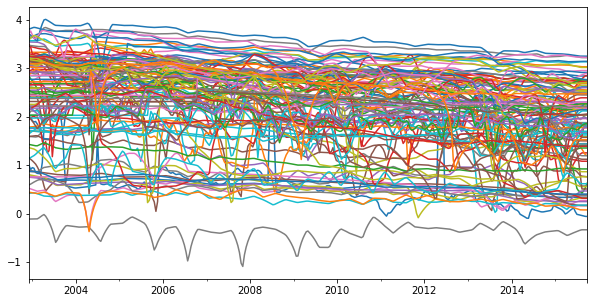

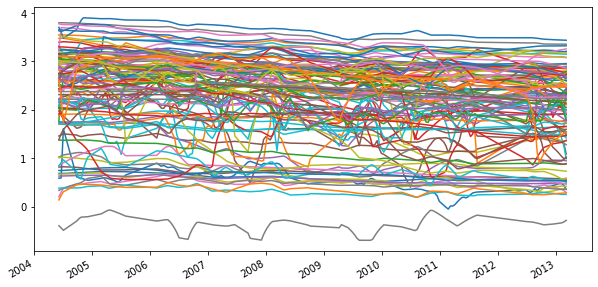

In [7]:
tritium.plot(legend=False, figsize=(10,5))
pylenm.remove_outliers(tritium, z_threshold=2.5).plot(legend=False, figsize=(10,5))
tritium_rm = pylenm.remove_outliers(tritium, z_threshold=2.5)
print(tritium.shape)
print(tritium_rm.shape)

In [8]:
pylenm.get_Construction_Data()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   
...                ...        ...   
FSP-12A            SRS        GSA   
FSP204A            SRS        GSA   
FSP226A            SRS        GSA   
FSP249A            SRS        GSA   
FSP249B            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
...                                                       ...   
FSP-12A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP204A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP226A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP249A     F-AREA WETLANDS PIEZOMETERS FOR WATER TABLE MO...   
FSP249B     F-AREA WETLANDS PIEZOMETERS FOR WATER TABLE MO...   

               STATION_TYPE               WELL USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
...                     ...                    ...        ...   
FSP-12A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP204A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP226A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP249A     PIEZOMETER WELL     Wetland Piezometer  UAZ_UTRAU   
FSP249B     PIEZOMETER WELL     Wetland Piezometer  UAZ_UTRAU   

                        WELL_USE   LATITUDE  LONGITUDE     EASTING  \
STATION_ID                                                           
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287   
...                          ...        ...        ...         ...   
FSP-12A     ACTIVE ECO-SENSITIVE  33.269561 -81.679075  436755.266   
FSP204A     ACTIVE ECO-SENSITIVE  33.267533 -81.680587  436612.996   
FSP226A     ACTIVE ECO-SENSITIVE  33.267186 -81.681189  436556.675   
FSP249A     ACTIVE ECO-SENSITIVE  33.265634 -81.682655  436418.964   
FSP249B     ACTIVE ECO-SENSITIVE  33.265644 -81.682660  436418.523   

               NORTHING  SZ_TOP(FT MSL)  SZ_BOT(FT MSL)  GROUND_ELEVATION  \
STATION_ID                                                                  
FAI001A     3681629.999          232.30          231.30             250.1   
FAI001B     3681630.192          241.60          240.60             250.2   
FAI001C     3681630.247          243.68          242.68             250.2   
FAI001D     3681630.223          247.75          246.75             250.1   
FAI002A     3680567.719          166.88          165.88             185.1   
...                 ...             ...             ...               ...   
FSP-12A     3681184.762          188.78          186.27             200.7   
FSP204A     3680960.787          178.27          175.78             190.5   
FSP226A     3680922.679          177.41          174.90             189.5   
FSP249A     3680751.569          173.00          170.50             185.5   
FS

['FPZ008AR', 'FSB 93D', 'FPZ  2A', 'FSB133D', 'FPZ  3A', 'FSB123D', 'FSB 90D', 'FSB 91D', 'FSP  2A', 'FSB 95DR', 'FSB128D', 'FSB 76', 'FSB114D', 'FSB108D', 'FSB 92D', 'FSP204A', 'FBI 14D', 'FSB115D', 'FSB104D', 'FSB 99D', 'FOB 13D', 'FEX  4', 'FSP-072A', 'FSB 94DR', 'FSB 87D', 'FSB 89D', 'FSP-12A', 'FSB135D', 'FSB130D', 'FSB137D', 'FSB 98D', 'FPZ  6B', 'FSB109D', 'FSB136D', 'FSB122D', 'FPZ008BR', 'FSB120D', 'FSP  2B', 'FSB138D', 'FSB126D', 'FSB 79', 'FPZ  6A', 'FSB117D', 'FSP-072B', 'FSB124D', 'FSB129D', 'FSP249A', 'FSB118D', 'FPZ  7A', 'FSP226A', 'FSB112DR', 'FPZ  4A', 'FSB125DR', 'FSB116D', 'FSB132D', 'FSB134D', 'FPZ  7B', 'FSB 88D', 'FSP 47A', 'FSB 78', 'FOB 14D', 'FSB127D', 'FSB 97D', 'FSP249B']


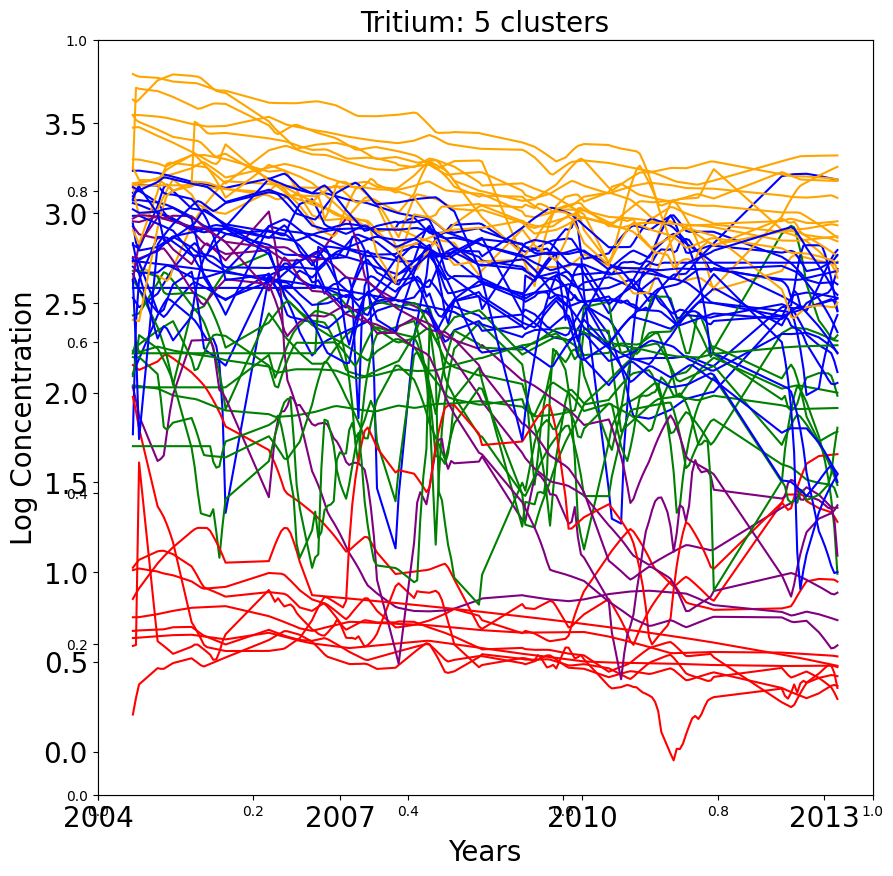

In [9]:
cluster_data = pylenm.cluster_data(analyte_name= 'Tritium', data = tritium_rm, n_clusters=5, year_interval=3, return_clusters=True, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], y_label = 'Log Concentration')

In [11]:
cluster_data[['STATION_ID', 'color']].head()

STATION_ID   color
0    FBI 14D  orange
1     FEX  4   green
2    FOB 13D    blue
3    FOB 14D  orange
4    FPZ  2A     red

In [12]:
pylenm.plot_coordinates_to_map(cluster_data)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…